# Cleaning Data

# Diagnose data for cleaning

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
data = pd.read_csv('pokemon.csv',index_col='#')
#data.info()
data.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                               
1      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2        Ivysaur  Grass  Poison  60      62       63       80       80     60   
3       Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
5     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
#                         
1           1      False  
2           1      False  
3           1      False  
4           1      False  
5           1      False

In [2]:
data.columns

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [4]:
data.describe()

HP      Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

       Generation  
count   800.00000  
mean      3.32375  
std       1.66129  
min       1.00000  
25%       2.00000  
50%       3.00000  
75%       5.00000  
max       6.00000

# Exploratory data analysis (EDA)

In [5]:
print(data['Type 1'].value_counts(dropna =False))  # if there are nan values that also be counted
# As it can be seen below there are 112 water pokemon or 70 grass pokemon

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [6]:
data.isna().sum()

Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

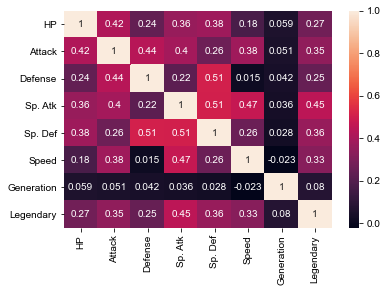

In [7]:
sns.heatmap(data.corr(),annot=True)
sns.set(rc={'figure.figsize':(15,15)})
plt.savefig('graph22.jpeg')

# Visual exploratory data analysis

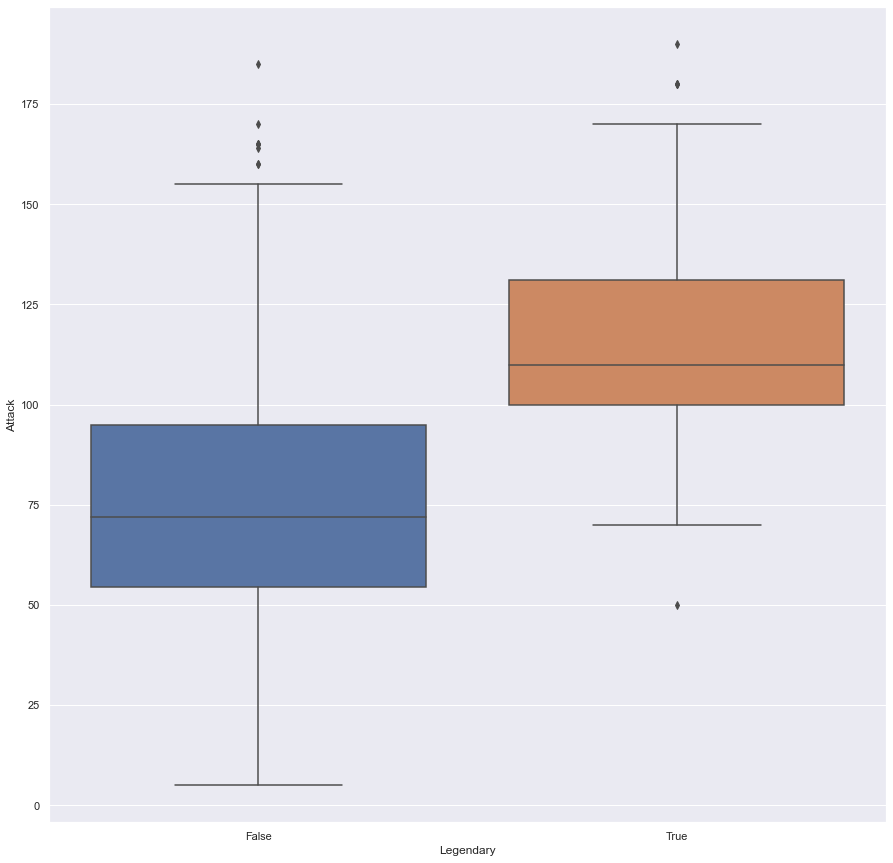

In [8]:
sns.boxplot(x=data['Legendary'],y=data['Attack'])
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
sns.set(rc={'figure.figsize':(4,8)})
plt.savefig('graph23.jpeg')

# Tidy data

In [9]:
data_new = data.head()    # I only take 5 rows into new data
data_new

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                               
1      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2        Ivysaur  Grass  Poison  60      62       63       80       80     60   
3       Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
5     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
#                         
1           1      False  
2           1      False  
3           1      False  
4           1      False  
5           1      False

In [10]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

Name variable  value
0      Bulbasaur   Attack     49
1        Ivysaur   Attack     62
2       Venusaur   Attack     82
3  Mega Venusaur   Attack    100
4     Charmander   Attack     52
5      Bulbasaur  Defense     49
6        Ivysaur  Defense     63
7       Venusaur  Defense     83
8  Mega Venusaur  Defense    123
9     Charmander  Defense     43

# Pivoting data

In [11]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable       Attack  Defense
Name                          
Bulbasaur          49       49
Charmander         52       43
Ivysaur            62       63
Mega Venusaur     100      123
Venusaur           82       83

# Concatenating data

In [12]:
# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0       Bulbasaur    Grass  Poison  45      49       49       65       65   
1         Ivysaur    Grass  Poison  60      62       63       80       80   
2        Venusaur    Grass  Poison  80      82       83      100      100   
3   Mega Venusaur    Grass  Poison  80     100      123      122      120   
4      Charmander     Fire     NaN  39      52       43       60       50   
5         Diancie     Rock   Fairy  50     100      150      100      150   
6    Mega Diancie     Rock   Fairy  50     160      110      160      110   
7  Hoopa Confined  Psychic   Ghost  80     110       60      150      130   
8   Hoopa Unbound  Psychic    Dark  80     160       60      170      130   
9       Volcanion     Fire   Water  80     110      120      130       90   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False  
5     50           6       True  
6    110           6       True  
7     70           6       True  
8     80           6       True  
9     70           6       True

In [13]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

Attack  Defense
#                 
1      49       49
2      62       63
3      82       83
4     100      123
5      52       43

# Data types

In [14]:
print(data.dtypes)
#data['Type 1'] = data['Type 1'].astype('category')
#data['Speed'] = data['Speed'].astype('float')
#print(data.dtypes)

Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


# Missing data and testing with assert

In [15]:
# Lets chech Type 2
data["Type 2"].value_counts(dropna =False) 
# As you can see, there are 386 NAN value

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ice          14
Ghost        14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [16]:
# Lets drop nan values
data1=data.copy()   # also we will use data to fill missing value so I assign it to data1 variable
data1["Type 2"].dropna(inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
# assert data1['Type 2'].notnull().all() # returns nothing because we drop nan values
# data1["Type 2"].fillna('empty',inplace = True) # ıstersen empty ıle de doldurabılırız
# # # With assert statement we can check a lot of thing. For example
# # assert data.columns[1] == 'Name'
# # assert data.Speed.dtypes == np.int

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

percentage_people_below_poverty_level = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding="windows-1252")

In [18]:
percentage_people_below_poverty_level.head()

Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5
3              AL     Addison town         30.7
4              AL       Akron town           42

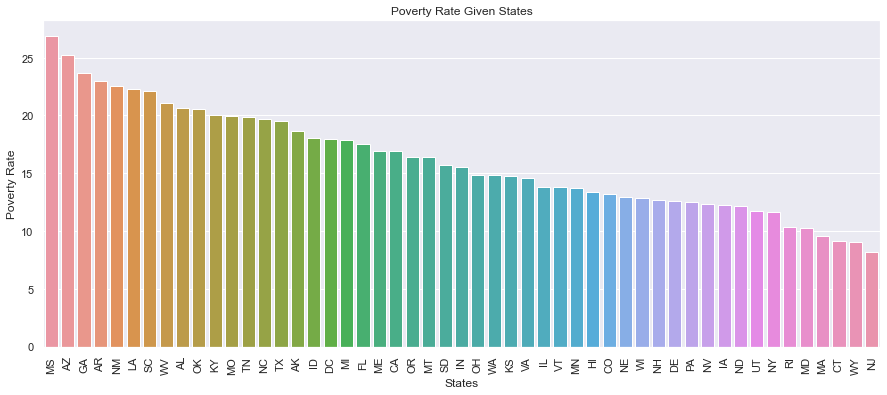

In [19]:
# Poverty rate of each state
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')
plt.savefig('graph.jpeg')

In [20]:
kill.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

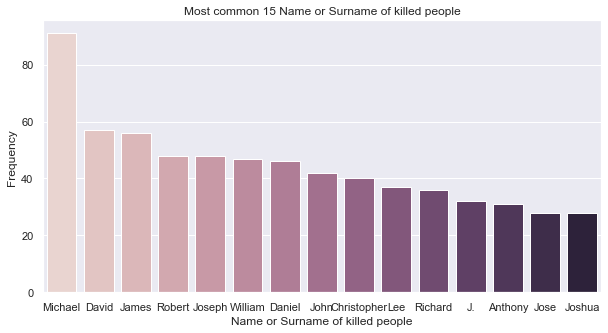

In [21]:
# Most common 15 Name or Surname of killed people
separate = kill.name[kill.name != 'TK TK'].str.split() 
a,b = zip(*separate)                    
name_list = a+b                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)
# 
plt.figure(figsize=(10,5))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')
plt.savefig('graph1.jpeg')

# Point Plot

In [22]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

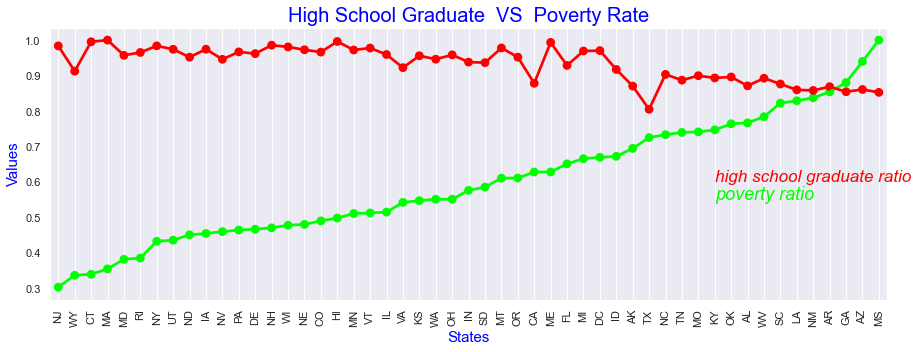

In [23]:
# high school graduation rate vs Poverty rate of each state
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

# visualize
f,ax1 = plt.subplots(figsize =(15,5))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xticks(rotation= 90)
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()
plt.savefig('graph2.jpeg')


# Joint Plot

C:\Users\Balram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Balram\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


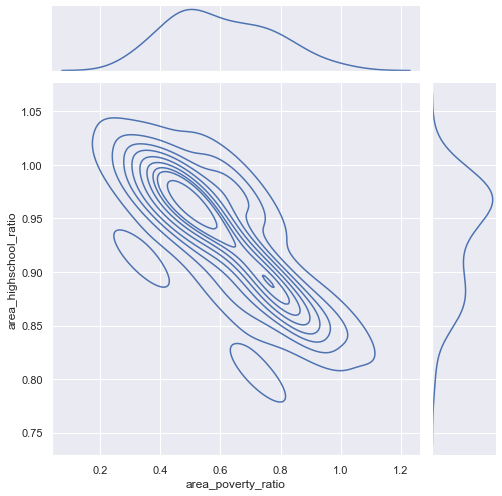

In [24]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7)
plt.savefig('graph3.jpeg')
plt.show()

C:\Users\Balram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


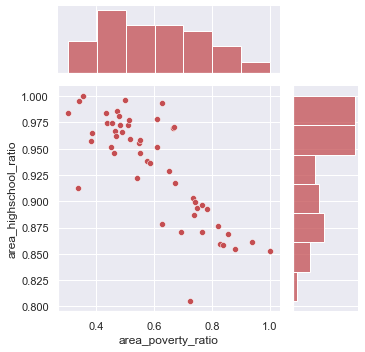

In [25]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,height=5, ratio=3, color="r")

# Pie Plot

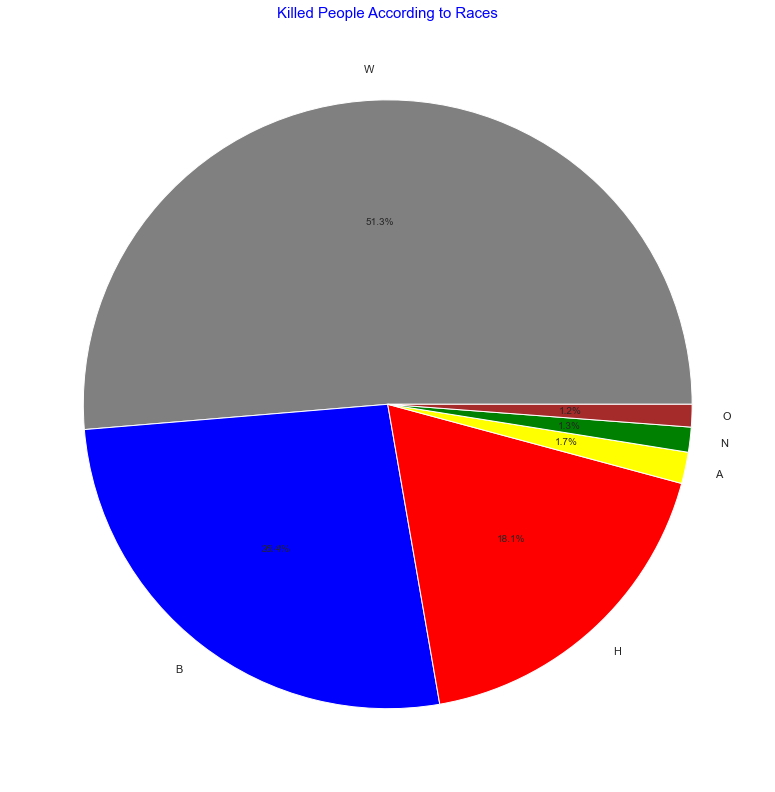

In [26]:
# Race rates according in kill data 
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

# visual
plt.figure(figsize = (14,14))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)
plt.savefig('graph4.jpeg')

# Lm Plot

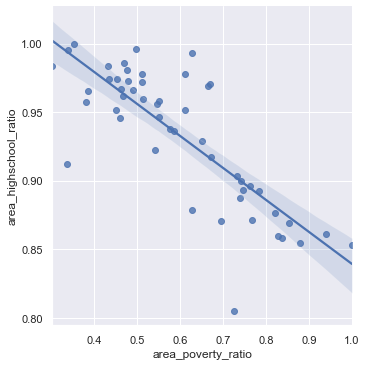

<Figure size 432x288 with 0 Axes>

In [27]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()
plt.savefig('graph5.jpeg')

# Kde Plot

C:\Users\Balram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


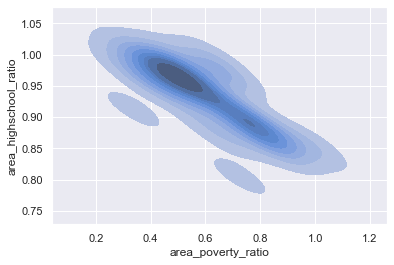

In [28]:
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=3)
plt.show()

# Violin Plot

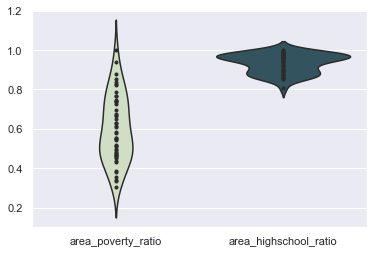

<Figure size 432x288 with 0 Axes>

In [29]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()
plt.savefig('graph6.jpeg')

# Heat Map

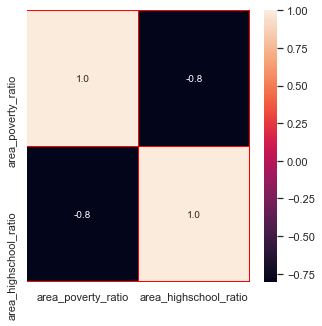

<Figure size 432x288 with 0 Axes>

In [30]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()
plt.savefig('graph7.jpeg')

# Box Plot

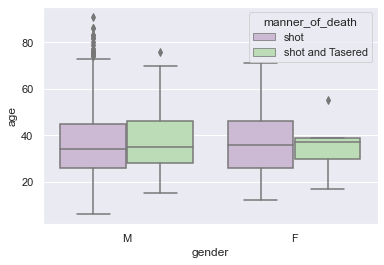

<Figure size 432x288 with 0 Axes>

In [31]:
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# Plot the orbital period with horizontal boxes
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()
plt.savefig('graph7.jpeg')

# Swarm Plot

C:\Users\Balram\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


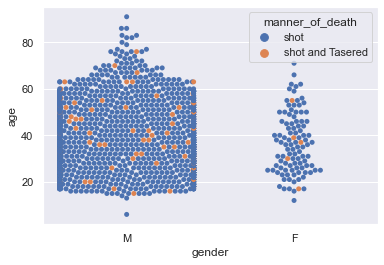

<Figure size 432x288 with 0 Axes>

In [32]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()
plt.savefig('graph8.jpeg')

# Pair Plot

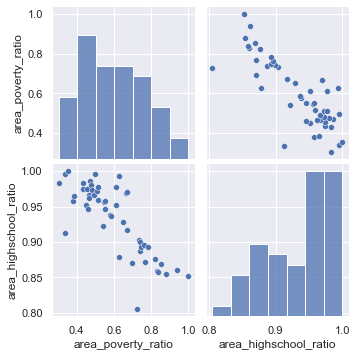

In [33]:
# pair plot
sns.pairplot(data)
plt.show()

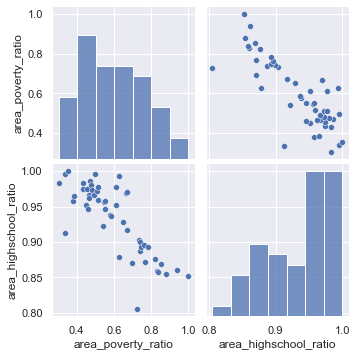

<Figure size 432x288 with 0 Axes>

In [34]:
# pair plot
sns.pairplot(data)
plt.show()
plt.savefig('graph9.jpeg')

# countplot

C:\Users\Balram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'gender')

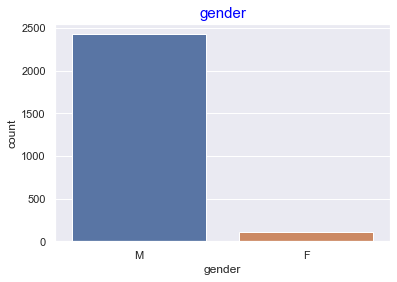

In [35]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

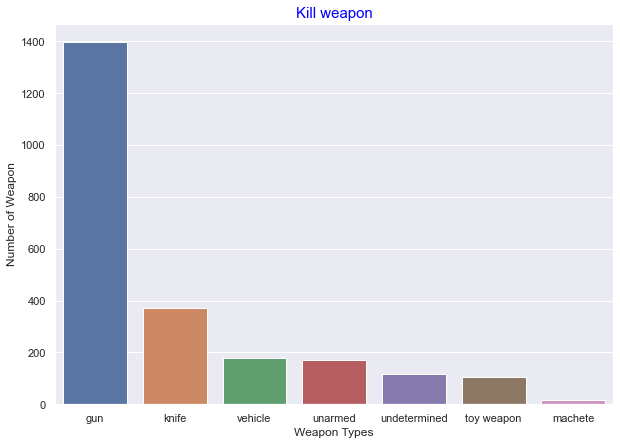

In [36]:
# kill weapon
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)
plt.savefig('graph10.jpeg')

# Plotly

# Line Plot

In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Load data that we will use.
timesData = pd.read_csv("timesData.csv")
timesData.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011

In [38]:
# prepare data frame
df = timesData.iloc[:10,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
plt.savefig('graph11.jpeg')

<Figure size 432x288 with 0 Axes>

In [39]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:10,:]
df2015 = timesData[timesData.year == 2015].iloc[:10,:]
df2016 = timesData[timesData.year == 2016].iloc[:10,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
plt.savefig('graph12.jpeg')

<Figure size 432x288 with 0 Axes>

bar plot

In [40]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
df2014

world_rank                     university_name                   country  \
1002          1  California Institute of Technology  United States of America   
1003          2                  Harvard University  United States of America   
1004          2                University of Oxford            United Kingdom   

      teaching international  research  citations income total_score  \
1002      94.4          65.8      98.2       99.8   91.2        94.9   
1003      95.3          66.2      98.5       99.1   40.6        93.9   
1004      89.0          90.2      98.5       95.4   90.3        93.9   

     num_students  student_staff_ratio international_students  \
1002        2,243                  6.9                    27%   
1003       20,152                  8.9                    25%   
1004       19,919                 11.6                    34%   

     female_male_ratio  year  
1002           33 : 67  2014  
1003               NaN  2014  
1004           46 : 54  2014

In [41]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)
plt.savefig('graph13.jpeg')

<Figure size 432x288 with 0 Axes>

In [42]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)
plt.savefig('graph14.jpeg')

<Figure size 432x288 with 0 Axes>

In [43]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name    
    }
]
iplot(data)
plt.savefig('graph15.jpeg')

<Figure size 432x288 with 0 Axes>

In [44]:
# prepare data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
plt.savefig('graph16.jpeg')

<Figure size 432x288 with 0 Axes>

In [45]:
# # data prepararion
# x2011 = timesData.country[timesData.year == 2011]
# plt.subplots(figsize=(8,8))
# wordcloud = WordCloud(
#                           background_color='white',
#                           width=512,
#                           height=384
#                          ).generate(" ".join(x2011))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.savefig('graph.png')

# plt.show()

In [46]:
# data preparation
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

In [47]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)
plt.savefig('graph17.jpeg')

<Figure size 432x288 with 0 Axes>

Inset PLOT

In [48]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
plt.savefig('graph18.jpeg')

<Figure size 432x288 with 0 Axes>

Multiple subplots

In [49]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
plt.savefig('graph19.jpeg')

<Figure size 432x288 with 0 Axes>

In [50]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
plt.savefig('graph20.jpeg')

<Figure size 432x288 with 0 Axes>

# Animation Plot

In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization library
import chart_studio.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings            
warnings.filterwarnings("ignore") 

In [52]:
data = pd.read_csv("database.csv")
data = data.drop([3378,7512,20650])
data["year"]= [int(each.split("/")[2]) for each in data.iloc[:,0]]
data.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  Azimuthal Gap  \
0                     NaN        6.0             MW  ...            NaN   
1                     NaN        5.8             MW  ...            NaN   
2                     NaN        6.2             MW  ...            NaN   
3                     NaN        5.8             MW  ...            NaN   
4                     NaN        5.8             MW  ...            NaN   

   Horizontal Distance  Horizontal Error  Root Mean Square            ID  \
0                  NaN               NaN               NaN  ISCGEM860706   
1                  NaN               NaN               NaN  ISCGEM860737   
2                  NaN               NaN               NaN  ISCGEM860762   
3                  NaN               NaN               NaN  ISCGEM860856   
4                  NaN               NaN               NaN  ISCGEM860890   

   Source Location Source Magnitude Source     Status  year  
0  ISCGEM          ISCGEM           ISCGEM  Automatic  1965  
1  ISCGEM          ISCGEM           ISCGEM  Automatic  1965  
2  ISCGEM          ISCGEM           ISCGEM  Automatic  1965  
3  ISCGEM          ISCGEM           ISCGEM  Automatic  1965  
4  ISCGEM          ISCGEM           ISCGEM  Automatic  1965  

[5 rows x 22 columns]

In [53]:
dataset = data.loc[:,["Date","Latitude","Longitude","Type","Depth","Magnitude","year"]]
dataset.head()

Date  Latitude  Longitude        Type  Depth  Magnitude  year
0  01/02/1965    19.246    145.616  Earthquake  131.6        6.0  1965
1  01/04/1965     1.863    127.352  Earthquake   80.0        5.8  1965
2  01/05/1965   -20.579   -173.972  Earthquake   20.0        6.2  1965
3  01/08/1965   -59.076    -23.557  Earthquake   15.0        5.8  1965
4  01/09/1965    11.938    126.427  Earthquake   15.0        5.8  1965

In [55]:
years = [str(each) for each in list(data.year.unique())]  # str unique years
# make list of types
types = ['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst']
custom_colors = {
    'Earthquake': 'rgb(189, 2, 21)',
    'Nuclear Explosion': 'rgb(52, 7, 250)',
    'Explosion': 'rgb(99, 110, 250)',
    'Rock Burst': 'rgb(0, 0, 0)'
}
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

figure['layout']['geo'] = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, 
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1965',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
year = 1695
for ty in types:
    dataset_by_year = dataset[dataset['year'] == year]
    dataset_by_year_and_cont = dataset_by_year[dataset_by_year['Type'] == ty]
    
    data_dict = dict(
    type='scattergeo',
    lon = dataset['Longitude'],
    lat = dataset['Latitude'],
    hoverinfo = 'text',
    text = ty,
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = custom_colors[ty],
        opacity = 0.7),
)
    figure['data'].append(data_dict)
    
# make frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    for ty in types:
        dataset_by_year = dataset[dataset['year'] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[dataset_by_year['Type'] == ty]

        data_dict = dict(
                type='scattergeo',
                lon = dataset_by_year_and_cont['Longitude'],
                lat = dataset_by_year_and_cont['Latitude'],
                hoverinfo = 'text',
                text = ty,
                mode = 'markers',
                marker=dict(
                    sizemode = 'area',
                    sizeref = 1,
                    size= 10 ,
                    line = dict(width=1,color = "white"),
                    color = custom_colors[ty],
                    opacity = 0.7),
                name = ty
            )
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)


figure["layout"]["autosize"]= True
figure["layout"]["title"] = "Earthquake"       

figure['layout']['sliders'] = [sliders_dict]

iplot(figure)
plt.savefig('graph21.jpeg')

<Figure size 432x288 with 0 Axes>